In [1]:
import pandas as pd
import os
os.environ["OMP_NUM_THREADS"] = '1'
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from sklearn.metrics import pairwise_distances

In [2]:
# first we read the dataset using read csv from panda library
iris_dataset = pd.read_csv('iris.csv')

In [3]:
#show the data imported from iris.csv
iris_dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
#show first 5 data
iris_dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
#show last 5 data
iris_dataset.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [6]:
# check for sample size of data
len(iris_dataset)

150

In [7]:
#check for dimension of datset
iris_dataset.shape

(150, 6)

In [8]:
# check for what are the columns in dataset
iris_dataset.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [9]:
#check for data types
iris_dataset.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [10]:
# more info about dataset
iris_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [11]:
#describe the data
iris_dataset.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [12]:
#check for missing values in data
iris_dataset.isnull()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
145,False,False,False,False,False,False
146,False,False,False,False,False,False
147,False,False,False,False,False,False
148,False,False,False,False,False,False


In [13]:
#checking summary of missing values. if there has been any null then the values woould be no of NULL.
iris_dataset.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [14]:
iris_dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [15]:
#deletiing the id colimn as there os no refernce
#first parameter stand for column which you want to delete
#inlpace means it would work on orginal object
#axis=1 stand for column delete
iris_dataset.drop('Id', axis=1, inplace=True)
iris_dataset.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [16]:
iris_dataset.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [17]:
#Checking the value count of the target column i.e. 'Species' using value_counts()
iris_dataset['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [18]:
#spilting into training and target data
#target data
target_data = iris_dataset.iloc[:,4]
target_data.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

In [19]:
#training data
clustering_data = iris_dataset.iloc[:,[0,1,2,3]]
clustering_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [20]:
#elbow method
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    km = KMeans(i)
    km.fit(clustering_data)
    wcss.append(km.inertia_)
np.array(wcss)

C:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_

array([680.8244    , 152.36870648,  78.94084143,  57.31787321,
        46.53558205,  38.93873974,  34.63351789,  29.91463345,
        28.06475719,  26.57022491])

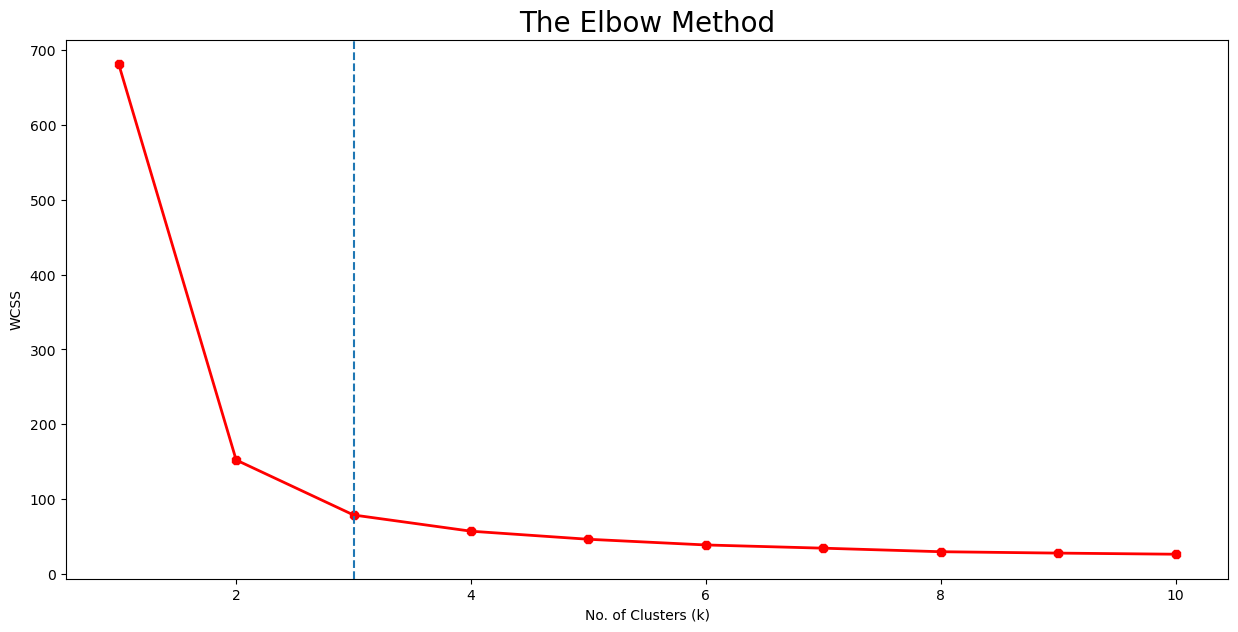

In [21]:
fig, ax = plt.subplots(figsize=(15,7))
ax = plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.axvline(x=3, ls='--')
plt.ylabel('WCSS')
plt.xlabel('No. of Clusters (k)')
plt.title('The Elbow Method', fontsize = 20)
plt.show()

# Random Centroid

In [22]:
from sklearn.cluster import KMeans

#convert dataset into array
X = clustering_data.values

#choose the row no of 3 centroids 
initial_indices = np.random.choice(150, size=3, replace=False)
print(initial_indices)
initial_centroids = X[initial_indices]

print("Initial Centroids:")
print(initial_centroids)

kms = KMeans(n_clusters=3, init=initial_centroids, n_init=1)
kms.fit(X)

print("Final Centroids:")
print(kms.cluster_centers_)


[ 92 130  36]
Initial Centroids:
[[5.8 2.6 4.  1.2]
 [7.4 2.8 6.1 1.9]
 [5.5 3.5 1.3 0.2]]
Final Centroids:
[[5.9016129  2.7483871  4.39354839 1.43387097]
 [6.85       3.07368421 5.74210526 2.07105263]
 [5.006      3.418      1.464      0.244     ]]


In [23]:
clusters = clustering_data.copy()
clusters['Cluster_Prediction'] = kms.fit_predict(clustering_data)
clusters.iloc[:,[0,1,2,3,4]].values

array([[5.1, 3.5, 1.4, 0.2, 2. ],
       [4.9, 3. , 1.4, 0.2, 2. ],
       [4.7, 3.2, 1.3, 0.2, 2. ],
       [4.6, 3.1, 1.5, 0.2, 2. ],
       [5. , 3.6, 1.4, 0.2, 2. ],
       [5.4, 3.9, 1.7, 0.4, 2. ],
       [4.6, 3.4, 1.4, 0.3, 2. ],
       [5. , 3.4, 1.5, 0.2, 2. ],
       [4.4, 2.9, 1.4, 0.2, 2. ],
       [4.9, 3.1, 1.5, 0.1, 2. ],
       [5.4, 3.7, 1.5, 0.2, 2. ],
       [4.8, 3.4, 1.6, 0.2, 2. ],
       [4.8, 3. , 1.4, 0.1, 2. ],
       [4.3, 3. , 1.1, 0.1, 2. ],
       [5.8, 4. , 1.2, 0.2, 2. ],
       [5.7, 4.4, 1.5, 0.4, 2. ],
       [5.4, 3.9, 1.3, 0.4, 2. ],
       [5.1, 3.5, 1.4, 0.3, 2. ],
       [5.7, 3.8, 1.7, 0.3, 2. ],
       [5.1, 3.8, 1.5, 0.3, 2. ],
       [5.4, 3.4, 1.7, 0.2, 2. ],
       [5.1, 3.7, 1.5, 0.4, 2. ],
       [4.6, 3.6, 1. , 0.2, 2. ],
       [5.1, 3.3, 1.7, 0.5, 2. ],
       [4.8, 3.4, 1.9, 0.2, 2. ],
       [5. , 3. , 1.6, 0.2, 2. ],
       [5. , 3.4, 1.6, 0.4, 2. ],
       [5.2, 3.5, 1.5, 0.2, 2. ],
       [5.2, 3.4, 1.4, 0.2, 2. ],
       [4.7, 3

In [24]:
kms.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.006     , 3.418     , 1.464     , 0.244     ]])

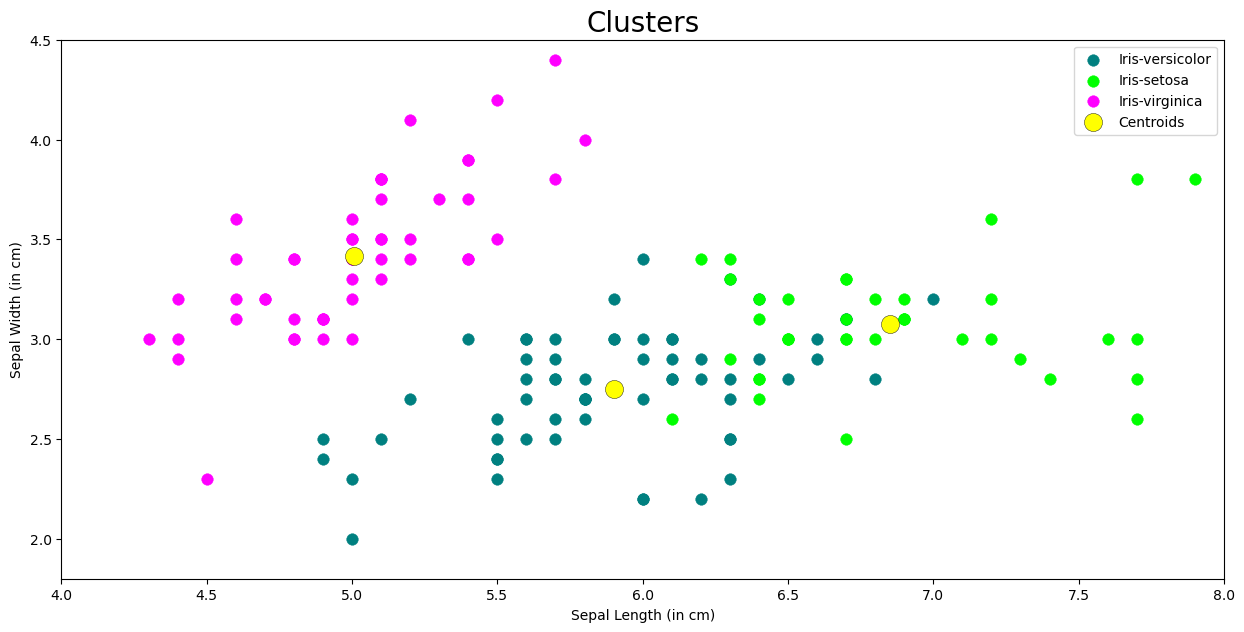

In [25]:
fig, ax = plt.subplots(figsize=(15,7)) 
plt.scatter(x=clusters[clusters['Cluster_Prediction'] == 0]['SepalLengthCm'],
            y=clusters[clusters['Cluster_Prediction'] == 0]['SepalWidthCm'],
            s=70,edgecolor='teal', linewidth=0.3, c='teal', label='Iris-versicolor')


plt.scatter(x=clusters[clusters['Cluster_Prediction'] == 1]['SepalLengthCm'],
            y=clusters[clusters['Cluster_Prediction'] == 1]['SepalWidthCm'],
            s=70,edgecolor='lime', linewidth=0.3, c='lime', label='Iris-setosa')


plt.scatter(x=clusters[clusters['Cluster_Prediction'] == 2]['SepalLengthCm'],
            y=clusters[clusters['Cluster_Prediction'] == 2]['SepalWidthCm'],
            s=70,edgecolor='magenta', linewidth=0.3, c='magenta', label='Iris-virginica')

plt.scatter(x=kms.cluster_centers_[:, 0], y=kms.cluster_centers_[:, 1], s = 170, c = 'yellow', label = 'Centroids',edgecolor='black', linewidth=0.3)
plt.legend(loc='upper right')
plt.xlim(4,8)
plt.ylim(1.8,4.5)
ax.set_ylabel('Sepal Width (in cm)')
ax.set_xlabel('Sepal Length (in cm)')
plt.title('Clusters', fontsize = 20)
plt.show()

In [26]:
#intracluster distance- for each iteration- min- (97,98)
cluster_labels = kms.labels_
cluster_centers = kms.cluster_centers_

# Calculate intra-cluster distances
intra_cluster_distances = np.zeros(3)

for i in range(3):
    cluster_points = X[cluster_labels == i]
    intra_cluster_distances[i] = np.sum(pairwise_distances(cluster_points, [cluster_centers[i]], metric='euclidean'))

print("Intra-Cluster Distances:", intra_cluster_distances)
sum=0
for i in range(0,3):
    sum=sum+intra_cluster_distances[i]
print("Sum of intracluster distances is: ",sum)

Intra-Cluster Distances: [45.76544689 27.35386486 24.20661248]
Sum of intracluster distances is:  97.32592423430025


In [27]:
#intercluster
inter_cluster_distances = pairwise_distances(cluster_centers, metric='euclidean')
print("Inter cluster distance: ")
print(inter_cluster_distances)

Inter cluster distance: 
[[0.         1.7971818  3.35388589]
 [1.7971818  0.         5.01589427]
 [3.35388589 5.01589427 0.        ]]


In [28]:
# number of elements in each cluster
cluster_assignments = kms.labels_
cluster_counts = np.bincount(cluster_assignments)

# Display it
for cluster_number, count in enumerate(cluster_counts):
    print(f"Cluster {cluster_number}: {count} elements")

Cluster 0: 62 elements
Cluster 1: 38 elements
Cluster 2: 50 elements


In [29]:
#actual values: 
# Number of elements in each actual class label
actual_counts = iris_dataset['Species'].value_counts()

# Display the number of elements in each actual class label
for species_label, count in actual_counts.items():
    print(f"Species {species_label}: {count} elements")

Species Iris-setosa: 50 elements
Species Iris-versicolor: 50 elements
Species Iris-virginica: 50 elements


In [30]:
#actual dataset intra cluster distance
from scipy.spatial.distance import euclidean

# Group the dataset by species
grouped_data = iris_dataset.groupby('Species')

# Calculate intra-cluster distances for each species
intra_cluster_distances_actual = {}

for species_label, group in grouped_data:
    species_data = group.iloc[:, :4].values  # Extracting features (assuming the first 4 columns are features)
    centroid = species_data.mean(axis=0)
    
    distances = [euclidean(point, centroid) for point in species_data]
    intra_cluster_distances_actual[species_label] = np.sum(distances)

# Display intra-cluster distances for each species
for species_label, distance in intra_cluster_distances_actual.items():
    print(f"Intra-Cluster Distance for Species {species_label}: {distance}")
total_intracluster_distance = 0

for species_label, distance in intra_cluster_distances_actual.items():
    total_intracluster_distance += distance

print("Total Intra-Cluster Distance for the Actual Dataset is:", total_intracluster_distance)

Intra-Cluster Distance for Species Iris-setosa: 24.206612483447003
Intra-Cluster Distance for Species Iris-versicolor: 35.34351020076097
Intra-Cluster Distance for Species Iris-virginica: 40.966970381744495
Total Intra-Cluster Distance for the Actual Dataset is: 100.51709306595247


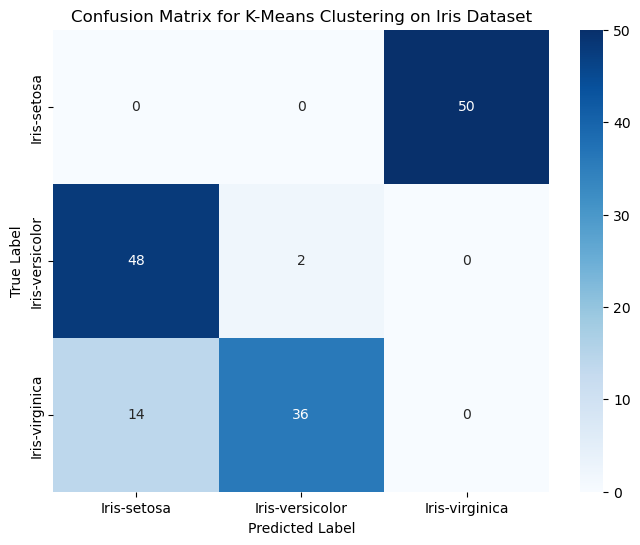

In [31]:
#confusion matrix: TP,TN, FP, FN
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Map the predicted cluster labels to the actual species labels
cluster_mapping = {
    0: 'Iris-setosa',
    1: 'Iris-versicolor',
    2: 'Iris-virginica'
}

# Map the cluster labels in the dataframe
clusters['Cluster_Prediction'] = clusters['Cluster_Prediction'].map(cluster_mapping)

# Create the confusion matrix
conf_matrix = confusion_matrix(target_data, clusters['Cluster_Prediction'])

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=cluster_mapping.values(),
            yticklabels=cluster_mapping.values())
plt.title('Confusion Matrix for K-Means Clustering on Iris Dataset')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [32]:
correct_predictions = np.sum(np.diag(conf_matrix))
total_predictions = np.sum(conf_matrix)
accuracy = correct_predictions / total_predictions

print(f"Accuracy: {accuracy:.2%}")

Accuracy: 1.33%


# Min Max centroid

In [33]:
centroid_max = np.max(X, axis=0)
centroid_min = np.min(X, axis=0)
print("max",centroid_max)
print("min",centroid_min)

max [7.9 4.4 6.9 2.5]
min [4.3 2.  1.  0.1]


In [34]:
num_centroids = 3
max_min_centroids = np.random.uniform(centroid_min, centroid_max, size=(num_centroids, len(centroid_max)))

print("Random Centroids:")
print(max_min_centroids)

Random Centroids:
[[7.75206326 4.33807427 4.26459499 2.20170591]
 [4.50068425 2.35229546 4.92489304 1.48698899]
 [6.12962913 2.6901654  1.48067729 1.53829486]]


In [35]:
kms = KMeans(n_clusters=3, init=max_min_centroids, n_init=10)
kms.fit(X)

print("Final Centroids:")
print(kms.cluster_centers_)

Final Centroids:
[[6.85384615 3.07692308 5.71538462 2.05384615]
 [5.88360656 2.74098361 4.38852459 1.43442623]
 [5.006      3.418      1.464      0.244     ]]


C:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  super()._check_params_vs_input(X, default_n_init=10)


In [36]:
clusters = clustering_data.copy()
clusters['Cluster_Prediction'] = kms.fit_predict(clustering_data)
clusters.iloc[:,[0,1,2,3,4]].values

C:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  super()._check_params_vs_input(X, default_n_init=10)


array([[5.1, 3.5, 1.4, 0.2, 2. ],
       [4.9, 3. , 1.4, 0.2, 2. ],
       [4.7, 3.2, 1.3, 0.2, 2. ],
       [4.6, 3.1, 1.5, 0.2, 2. ],
       [5. , 3.6, 1.4, 0.2, 2. ],
       [5.4, 3.9, 1.7, 0.4, 2. ],
       [4.6, 3.4, 1.4, 0.3, 2. ],
       [5. , 3.4, 1.5, 0.2, 2. ],
       [4.4, 2.9, 1.4, 0.2, 2. ],
       [4.9, 3.1, 1.5, 0.1, 2. ],
       [5.4, 3.7, 1.5, 0.2, 2. ],
       [4.8, 3.4, 1.6, 0.2, 2. ],
       [4.8, 3. , 1.4, 0.1, 2. ],
       [4.3, 3. , 1.1, 0.1, 2. ],
       [5.8, 4. , 1.2, 0.2, 2. ],
       [5.7, 4.4, 1.5, 0.4, 2. ],
       [5.4, 3.9, 1.3, 0.4, 2. ],
       [5.1, 3.5, 1.4, 0.3, 2. ],
       [5.7, 3.8, 1.7, 0.3, 2. ],
       [5.1, 3.8, 1.5, 0.3, 2. ],
       [5.4, 3.4, 1.7, 0.2, 2. ],
       [5.1, 3.7, 1.5, 0.4, 2. ],
       [4.6, 3.6, 1. , 0.2, 2. ],
       [5.1, 3.3, 1.7, 0.5, 2. ],
       [4.8, 3.4, 1.9, 0.2, 2. ],
       [5. , 3. , 1.6, 0.2, 2. ],
       [5. , 3.4, 1.6, 0.4, 2. ],
       [5.2, 3.5, 1.5, 0.2, 2. ],
       [5.2, 3.4, 1.4, 0.2, 2. ],
       [4.7, 3

In [37]:
kms.cluster_centers_

array([[6.85384615, 3.07692308, 5.71538462, 2.05384615],
       [5.88360656, 2.74098361, 4.38852459, 1.43442623],
       [5.006     , 3.418     , 1.464     , 0.244     ]])

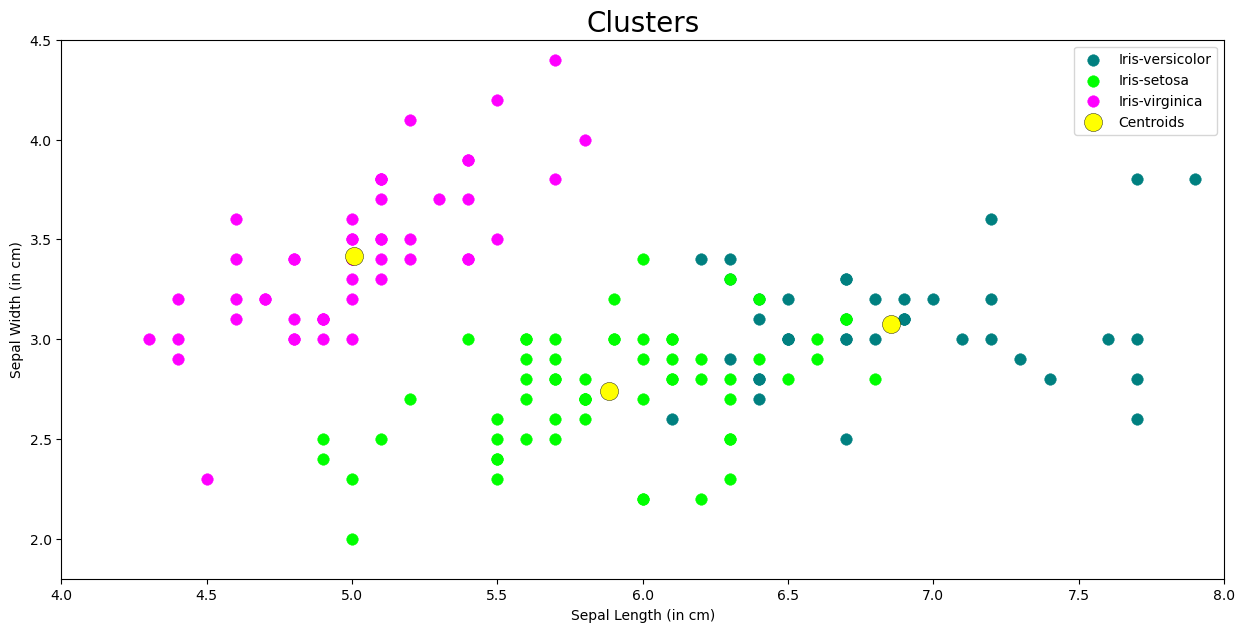

In [38]:
fig, ax = plt.subplots(figsize=(15,7)) 
plt.scatter(x=clusters[clusters['Cluster_Prediction'] == 0]['SepalLengthCm'],
            y=clusters[clusters['Cluster_Prediction'] == 0]['SepalWidthCm'],
            s=70,edgecolor='teal', linewidth=0.3, c='teal', label='Iris-versicolor')


plt.scatter(x=clusters[clusters['Cluster_Prediction'] == 1]['SepalLengthCm'],
            y=clusters[clusters['Cluster_Prediction'] == 1]['SepalWidthCm'],
            s=70,edgecolor='lime', linewidth=0.3, c='lime', label='Iris-setosa')


plt.scatter(x=clusters[clusters['Cluster_Prediction'] == 2]['SepalLengthCm'],
            y=clusters[clusters['Cluster_Prediction'] == 2]['SepalWidthCm'],
            s=70,edgecolor='magenta', linewidth=0.3, c='magenta', label='Iris-virginica')

plt.scatter(x=kms.cluster_centers_[:, 0], y=kms.cluster_centers_[:, 1], s = 170, c = 'yellow', label = 'Centroids',edgecolor='black', linewidth=0.3)
plt.legend(loc='upper right')
plt.xlim(4,8)
plt.ylim(1.8,4.5)
ax.set_ylabel('Sepal Width (in cm)')
ax.set_xlabel('Sepal Length (in cm)')
plt.title('Clusters', fontsize = 20)
plt.show()

In [39]:
#intracluster distance- for each iteration- min- (97,98)
cluster_labels = kms.labels_
cluster_centers = kms.cluster_centers_

# Calculate intra-cluster distances
intra_cluster_distances = np.zeros(3)

for i in range(3):
    cluster_points = X[cluster_labels == i]
    intra_cluster_distances[i] = np.sum(pairwise_distances(cluster_points, [cluster_centers[i]], metric='euclidean'))

print("Intra-Cluster Distances:", intra_cluster_distances)
sum=0
for i in range(0,3):
    sum=sum+intra_cluster_distances[i]
print("Sum of intracluster distances is: ",sum)

Intra-Cluster Distances: [28.54198926 44.59761795 24.20661248]
Sum of intracluster distances is:  97.34621969415768


In [40]:
#intercluster
inter_cluster_distances = pairwise_distances(cluster_centers, metric='euclidean')
print("Inter cluster distance: ",inter_cluster_distances)

Inter cluster distance:  [[0.         1.78842354 4.98805404]
 [1.78842354 0.         3.34641646]
 [4.98805404 3.34641646 0.        ]]


In [41]:
# number of elements in each cluster
cluster_assignments = kms.labels_
cluster_counts = np.bincount(cluster_assignments)

# Display it
for cluster_number, count in enumerate(cluster_counts):
    print(f"Cluster {cluster_number}: {count} elements")

Cluster 0: 39 elements
Cluster 1: 61 elements
Cluster 2: 50 elements


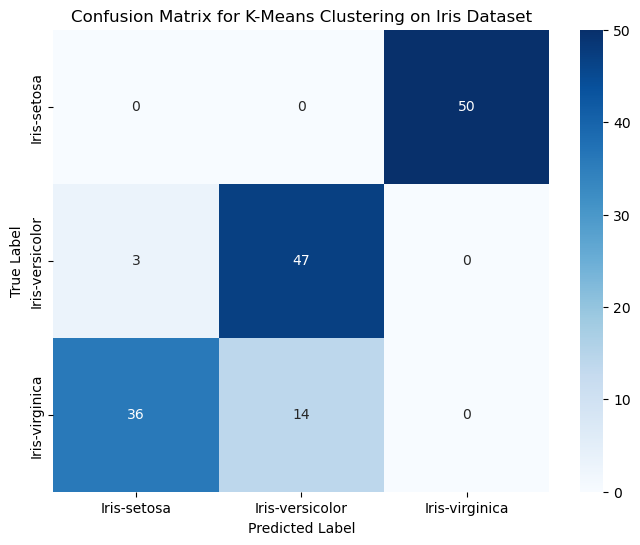

In [42]:
#confusion matrix: TP,TN, FP, FN
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Map the predicted cluster labels to the actual species labels
cluster_mapping = {
    0: 'Iris-setosa',
    1: 'Iris-versicolor',
    2: 'Iris-virginica'
}

# Map the cluster labels in the dataframe
clusters['Cluster_Prediction'] = clusters['Cluster_Prediction'].map(cluster_mapping)

# Create the confusion matrix
conf_matrix = confusion_matrix(target_data, clusters['Cluster_Prediction'])

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=cluster_mapping.values(),
            yticklabels=cluster_mapping.values())
plt.title('Confusion Matrix for K-Means Clustering on Iris Dataset')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [43]:
correct_predictions = np.sum(np.diag(conf_matrix))
total_predictions = np.sum(conf_matrix)
accuracy = correct_predictions / total_predictions

print(f"Accuracy: {accuracy:.2%}")

Accuracy: 31.33%
